In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler,RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,confusion_matrix,roc_auc_score,plot_roc_curve,f1_score


In [98]:
loan_train=pd.read_csv(r'C:\Users\jayac\Downloads\Dataset\Loan Prediction Train.csv')
loan_test=pd.read_csv(r'C:\Users\jayac\Downloads\Dataset\Loan Prediction Test.csv')

In [99]:
loan_train.shape,loan_test.shape

((614, 13), (367, 12))

In [100]:
loan_train.columns.isin(loan_test.columns)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False])

In [101]:
(loan_train.isna().sum()/loan_train.shape[0])*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [102]:
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [103]:
loan_train['Source']='train'
loan_test['Source']='test'

In [104]:
df=pd.concat([loan_train,loan_test],axis=0)

In [105]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Source
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,train
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,train
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,train
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,train
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,train


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  Source             981 non-null    object 
dtypes: float64(4), int64(1), object(9)
memory usage: 115.0+ KB


In [107]:
df['Loan_ID'].value_counts()

LP001347    1
LP002441    1
LP002137    1
LP002566    1
LP001846    1
           ..
LP002890    1
LP002387    1
LP001195    1
LP002716    1
LP001186    1
Name: Loan_ID, Length: 981, dtype: int64

In [108]:
df['Gender'].value_counts()

Male      775
Female    182
Name: Gender, dtype: int64

In [109]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [110]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

In [111]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [112]:
df['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [113]:
df['Married'].value_counts()

Yes    631
No     347
Name: Married, dtype: int64

In [114]:
df['Married'].fillna(df['Married'].mode()[0], inplace=True)

In [115]:
df['Dependents'].isna().sum()

25

In [116]:
df.groupby(['Dependents','Married']).size()

Dependents  Married
0           No         276
            Yes        269
1           No          36
            Yes        124
2           No          14
            Yes        146
3+          No          12
            Yes         79
dtype: int64

In [117]:
df['Dependents'].value_counts()

0     545
1     160
2     160
3+     91
Name: Dependents, dtype: int64

In [118]:
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)

In [119]:
df['Dependents']=df['Dependents'].apply(lambda x : x.strip('+'))

In [120]:
df['Dependents'].unique()

array(['0', '1', '2', '3'], dtype=object)

In [121]:
df['Dependents']=df['Dependents'].apply(lambda x: int(x))

In [122]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [123]:
df['Self_Employed'].value_counts()

No     807
Yes    119
Name: Self_Employed, dtype: int64

In [124]:
#df['Self_Employed'].fillna('No',inplace=True)
df['Self_Employed'] = df.groupby('Education').Self_Employed.transform(lambda x: x.fillna(x.mode()[0]))

In [125]:
df['Education'].isna().sum()

0

In [126]:
df['Self_Employed'].isna().sum()

0

In [127]:
df['ApplicantIncome'].unique()

array([ 5849,  4583,  3000,  2583,  6000,  5417,  2333,  3036,  4006,
       12841,  3200,  2500,  3073,  1853,  1299,  4950,  3596,  3510,
        4887,  2600,  7660,  5955,  3365,  3717,  9560,  2799,  4226,
        1442,  3750,  4166,  3167,  4692,  3500, 12500,  2275,  1828,
        3667,  3748,  3600,  1800,  2400,  3941,  4695,  3410,  5649,
        5821,  2645,  4000,  1928,  3086,  4230,  4616, 11500,  2708,
        2132,  3366,  8080,  3357,  3029,  2609,  4945,  5726, 10750,
        7100,  4300,  3208,  1875,  4755,  5266,  1000,  3333,  3846,
        2395,  1378,  3988,  2366,  8566,  5695,  2958,  6250,  3273,
        4133,  3620,  6782,  2484,  1977,  4188,  1759,  4288,  4843,
       13650,  4652,  3816,  3052, 11417,  7333,  3800,  2071,  5316,
        2929,  3572,  7451,  5050, 14583,  2214,  5568, 10408,  5667,
        2137,  2957,  3692, 23803,  3865, 10513,  6080, 20166,  2014,
        2718,  3459,  4895,  3316, 14999,  4200,  5042,  6950,  2698,
       11757,  2330,

In [128]:
df['CoapplicantIncome'].unique()

array([0.00000000e+00, 1.50800000e+03, 2.35800000e+03, 4.19600000e+03,
       1.51600000e+03, 2.50400000e+03, 1.52600000e+03, 1.09680000e+04,
       7.00000000e+02, 1.84000000e+03, 8.10600000e+03, 2.84000000e+03,
       1.08600000e+03, 3.50000000e+03, 5.62500000e+03, 1.91100000e+03,
       1.91700000e+03, 2.92500000e+03, 2.25300000e+03, 1.04000000e+03,
       2.08300000e+03, 3.36900000e+03, 1.66700000e+03, 3.00000000e+03,
       2.06700000e+03, 1.33000000e+03, 1.45900000e+03, 7.21000000e+03,
       1.66800000e+03, 1.21300000e+03, 2.33600000e+03, 3.44000000e+03,
       2.27500000e+03, 1.64400000e+03, 1.16700000e+03, 1.59100000e+03,
       2.20000000e+03, 2.25000000e+03, 2.85900000e+03, 3.79600000e+03,
       3.44900000e+03, 4.59500000e+03, 2.25400000e+03, 3.06600000e+03,
       1.87500000e+03, 1.77400000e+03, 4.75000000e+03, 3.02200000e+03,
       4.00000000e+03, 2.16600000e+03, 1.88100000e+03, 2.53100000e+03,
       2.00000000e+03, 2.11800000e+03, 4.16700000e+03, 2.90000000e+03,
      

In [129]:
df['LoanAmount'].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [130]:
df['Total_income']=df['ApplicantIncome']+df['CoapplicantIncome']

In [131]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Source,Total_income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,train,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,train,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,train,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,train,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,train,6000.0


In [132]:
df.groupby(['Total_income','Property_Area','Education']).LoanAmount.mean()

Total_income  Property_Area  Education   
1442.0        Urban          Not Graduate     35.0
1760.0        Semiurban      Not Graduate    180.0
1830.0        Urban          Not Graduate      NaN
1880.0        Rural          Graduate         61.0
1950.0        Rural          Graduate        135.0
                                             ...  
43897.0       Semiurban      Graduate        120.0
51763.0       Urban          Graduate        700.0
63337.0       Urban          Graduate        490.0
72529.0       Urban          Graduate        360.0
81000.0       Rural          Graduate        360.0
Name: LoanAmount, Length: 942, dtype: float64

In [133]:
df['Total_income'].value_counts()

5000.0     6
6500.0     6
2500.0     5
6000.0     5
5833.0     5
          ..
14987.0    1
5203.0     1
5705.0     1
6256.0     1
3000.0     1
Name: Total_income, Length: 848, dtype: int64

In [134]:
df['LoanAmount']=df.groupby(['Property_Area','Education']).LoanAmount.transform(lambda x: x.fillna(x.mean()))

In [135]:
df['LoanAmount'].isna().sum()

0

In [136]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.,
       350.,   6.])

In [137]:
df['Loan_Amount_Term'].isna().sum()

20

In [138]:
df['Loan_Amount_Term'].value_counts()

360.0    823
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
36.0       3
60.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [139]:
df['Loan_Amount_Term'].fillna(823,inplace=True)

In [140]:
df['Loan_Amount_Term']= df['Loan_Amount_Term']/12

In [141]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].apply(lambda x : int(x))

In [142]:
df['Credit_History'].isna().sum()

79

In [143]:
df['Credit_History'].value_counts()

1.0    754
0.0    148
Name: Credit_History, dtype: int64

In [144]:
df.loc[df['Credit_History']==0.0,:]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Source,Total_income
7,LP001014,Male,Yes,3,Graduate,No,3036,2504.0,158.0,30,0.0,Semiurban,N,train,5540.0
17,LP001036,Female,No,0,Graduate,No,3510,0.0,76.0,30,0.0,Urban,N,train,3510.0
20,LP001043,Male,Yes,0,Not Graduate,No,7660,0.0,104.0,30,0.0,Urban,N,train,7660.0
22,LP001047,Male,Yes,0,Not Graduate,No,2600,1911.0,116.0,30,0.0,Semiurban,N,train,4511.0
23,LP001050,Male,Yes,2,Not Graduate,No,3365,1917.0,112.0,30,0.0,Rural,N,train,5282.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,LP002774,Male,Yes,0,Not Graduate,No,1700,2900.0,67.0,30,0.0,Urban,NaN,test,4600.0
325,LP002802,Male,No,0,Graduate,No,2875,2416.0,95.0,0,0.0,Semiurban,NaN,test,5291.0
339,LP002858,Female,No,0,Graduate,No,4333,2333.0,162.0,30,0.0,Rural,NaN,test,6666.0
346,LP002879,Male,Yes,0,Graduate,No,3391,1966.0,133.0,30,0.0,Rural,NaN,test,5357.0


In [145]:
df.groupby(['Self_Employed','Credit_History']).size()

Self_Employed  Credit_History
No             0.0               134
               1.0               658
Yes            0.0                14
               1.0                96
dtype: int64

In [146]:
df['Credit_History']=df.groupby('Self_Employed').Credit_History.transform(lambda x:x.fillna(x.mode()[0]))

In [147]:
df['Credit_History'].value_counts()

1.0    833
0.0    148
Name: Credit_History, dtype: int64

In [148]:
df['Credit_History'].isna().sum()

0

In [149]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [150]:
df['Property_Area'].value_counts()

Semiurban    349
Urban        342
Rural        290
Name: Property_Area, dtype: int64

In [151]:
cat1=pd.get_dummies(df['Property_Area'],prefix='Property')
cat2=pd.get_dummies(df['Education'])
cat3=pd.get_dummies(df['Self_Employed'],prefix='Self_Employed')
cat4=cat3=pd.get_dummies(df['Married'],prefix='Married_status')

In [152]:
lb= LabelEncoder()
df['Gender']=lb.fit_transform(df['Gender'])
df['Loan_Status']= np.where(df['Loan_Status']=='Y',1,0)

In [153]:
df['Loan_Status'].unique()

array([1, 0])

In [154]:
df['Self_Employed'].value_counts()

No     862
Yes    119
Name: Self_Employed, dtype: int64

In [155]:
df['CoapplicantIncome']=df['CoapplicantIncome'].apply(lambda x :int(x))
df['Credit_History']=df['Credit_History'].apply(lambda x :int(x))

In [156]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Source,Total_income
0,LP001002,1,No,0,Graduate,No,5849,0,145.732075,30,1,Urban,1,train,5849.0
1,LP001003,1,Yes,1,Graduate,No,4583,1508,128.000000,30,1,Rural,0,train,6091.0
2,LP001005,1,Yes,0,Graduate,Yes,3000,0,66.000000,30,1,Urban,1,train,3000.0
3,LP001006,1,Yes,0,Not Graduate,No,2583,2358,120.000000,30,1,Urban,1,train,4941.0
4,LP001008,1,No,0,Graduate,No,6000,0,141.000000,30,1,Urban,1,train,6000.0


In [157]:
categorical=df.select_dtypes(exclude=np.number).drop(columns=['Loan_ID','Property_Area','Married','Education','Self_Employed'])

In [159]:
numerical=df.select_dtypes(include=np.number).drop(columns=['Total_income'])

In [160]:
numerical

,Gender,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,1,0,5849,0,145.732075,30,1,1
1,1,1,4583,1508,128.000000,30,1,0
2,1,0,3000,0,66.000000,30,1,1
3,1,0,2583,2358,120.000000,30,1,1
4,1,0,6000,0,141.000000,30,1,1
...,...,...,...,...,...,...,...,...
362,1,3,4009,1777,113.000000,30,1,0
363,1,0,4158,709,115.000000,30,1,0
364,1,0,3250,1993,126.000000,30,1,0
365,1,0,5000,2393,158.000000,30,1,0


In [161]:
df_final=pd.concat([cat1,cat2,cat3,cat4,categorical,numerical],axis=1)

In [162]:
df_final

,Property_Rural,Property_Semiurban,Property_Urban,Graduate,Not Graduate,Married_status_No,Married_status_Yes,Married_status_No,Married_status_Yes,Source,Gender,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0,0,1,1,0,1,0,1,0,train,1,0,5849,0,145.732075,30,1,1
1,1,0,0,1,0,0,1,0,1,train,1,1,4583,1508,128.000000,30,1,0
2,0,0,1,1,0,0,1,0,1,train,1,0,3000,0,66.000000,30,1,1
3,0,0,1,0,1,0,1,0,1,train,1,0,2583,2358,120.000000,30,1,1
4,0,0,1,1,0,1,0,1,0,train,1,0,6000,0,141.000000,30,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,0,0,1,0,1,0,1,0,1,test,1,3,4009,1777,113.000000,30,1,0
363,0,0,1,1,0,0,1,0,1,test,1,0,4158,709,115.000000,30,1,0
364,0,1,0,1,0,1,0,1,0,test,1,0,3250,1993,126.000000,30,1,0
365,1,0,0,1,0,0,1,0,1,test,1,0,5000,2393,158.000000,30,1,0


In [163]:
train_preprocessed=df_final[df_final['Source']=='train']
test_preprocessed=df_final[df_final['Source']=='test']

In [164]:
del train_preprocessed['Source']
del test_preprocessed['Source']

In [165]:
train_preprocessed.shape,test_preprocessed.shape

((614, 17), (367, 17))

In [166]:
train_x=train_preprocessed.drop(columns=['Loan_Status'])
train_y=train_preprocessed['Loan_Status']
test_x=test_preprocessed.drop(columns=['Loan_Status'])
test_y=test_preprocessed['Loan_Status']


In [167]:
lm=LogisticRegression()

In [168]:
lm.fit(train_x,train_y)

C:\Users\jayac\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [169]:
pred_train=lm.predict(train_x)
pred_test=lm.predict(test_x)


In [170]:
print(accuracy_score(train_y,pred_train))

0.7654723127035831


In [171]:
def metric_score(actual, pred):
    print('confusion matrix: ', confusion_matrix(actual, pred))
    print('accuracy score: ', accuracy_score(actual, pred))
    print('recall_score: ', recall_score(actual, pred))
    print('precision score: ', precision_score(actual, pred))
    print('f1 score: ', f1_score(actual, pred))
    print('roc auc score: ', roc_auc_score(actual, pred))
    print('classification report : \n', classification_report(actual, pred))

In [172]:
metric_score(train_y,pred_train)

confusion matrix:  [[ 81 111]
 [ 33 389]]
accuracy score:  0.7654723127035831
recall_score:  0.9218009478672986
precision score:  0.778
f1 score:  0.8438177874186552
roc auc score:  0.6718379739336493
classification report : 
               precision    recall  f1-score   support

           0       0.71      0.42      0.53       192
           1       0.78      0.92      0.84       422

    accuracy                           0.77       614
   macro avg       0.74      0.67      0.69       614
weighted avg       0.76      0.77      0.75       614



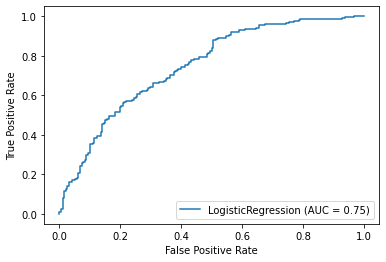

In [173]:
plot_roc_curve(lm,train_x,train_y)

## KNN

In [174]:
def KNN_predicts(train_x, test_x, train_y, scaler, neighbours, 
                 metric = 'manhattan', 
                 weights = 'uniform'):

    train_scaled = scaler.fit_transform(train_x)
    test_scaled = scaler.transform(test_x)

    KNN = KNeighborsClassifier(n_neighbors= neighbours, metric = metric, 
                               weights = weights, n_jobs = -1)
    KNN.fit(train_scaled, train_y)
    prediction_train = KNN.predict(train_scaled)
    prediction_test = KNN.predict(test_scaled)

    print('Accuracy: ', accuracy_score(train_y, prediction_train))
    print('-'*100)
    return KNN

In [175]:
KNN_predicts(train_x, test_x, train_y, RobustScaler(),1)

Accuracy:  1.0
----------------------------------------------------------------------------------------------------


KNeighborsClassifier(metric='manhattan', n_jobs=-1, n_neighbors=1)

In [176]:
for k in range(1, 11):
    print('Accuracy score on KNN using n_neighbors = {0}:'.format(k), end = ' ')
    KNN_predicts(train_x, test_x, train_y, StandardScaler(), k)

Accuracy score on KNN using n_neighbors = 1: Accuracy:  1.0
----------------------------------------------------------------------------------------------------
Accuracy score on KNN using n_neighbors = 2: Accuracy:  0.8729641693811075
----------------------------------------------------------------------------------------------------
Accuracy score on KNN using n_neighbors = 3: Accuracy:  0.8599348534201955
----------------------------------------------------------------------------------------------------
Accuracy score on KNN using n_neighbors = 4: Accuracy:  0.8485342019543974
----------------------------------------------------------------------------------------------------
Accuracy score on KNN using n_neighbors = 5: Accuracy:  0.8159609120521173
----------------------------------------------------------------------------------------------------
Accuracy score on KNN using n_neighbors = 6: Accuracy:  0.8127035830618893
------------------------------------------------------------

In [177]:
k=4
for metric in ['euclidean','minkowski','manhattan','chebyshev']:
    print('Accuracy score on KNN using {} metric and {} neighbors:'.format(metric,k), end = ' ')
    KNN_predicts(train_x, test_x, train_y, StandardScaler(), k,metric)

Accuracy score on KNN using euclidean metric and 4 neighbors: Accuracy:  0.8452768729641694
----------------------------------------------------------------------------------------------------
Accuracy score on KNN using minkowski metric and 4 neighbors: Accuracy:  0.8452768729641694
----------------------------------------------------------------------------------------------------
Accuracy score on KNN using manhattan metric and 4 neighbors: Accuracy:  0.8485342019543974
----------------------------------------------------------------------------------------------------
Accuracy score on KNN using chebyshev metric and 4 neighbors: Accuracy:  0.8566775244299675
----------------------------------------------------------------------------------------------------


In [178]:
for weight in ['uniform','distance']:
    print('Accuracy score on KNN using  neighbors {} weights: '.format(weight), end = ' ')
    KNN_predicts(train_x, test_x, train_y, StandardScaler(), 4,'chebyshev',weights=weight)

Accuracy score on KNN using  neighbors uniform weights:  Accuracy:  0.8566775244299675
----------------------------------------------------------------------------------------------------
Accuracy score on KNN using  neighbors distance weights:  Accuracy:  1.0
----------------------------------------------------------------------------------------------------


In [179]:
scaler=StandardScaler()
train_scaled = scaler.fit_transform(train_x)
test_scaled = scaler.transform(test_x)

KNN = KNeighborsClassifier(n_neighbors= 4, metric = 'chebyshev', 
                               weights = 'uniform', n_jobs = -1)
KNN.fit(train_scaled, train_y)
prediction_train = KNN.predict(train_scaled)
prediction_test = KNN.predict(test_scaled)

In [180]:
metric_score(train_y, prediction_train)

confusion matrix:  [[136  56]
 [ 32 390]]
accuracy score:  0.8566775244299675
recall_score:  0.9241706161137441
precision score:  0.874439461883408
f1 score:  0.8986175115207373
roc auc score:  0.8162519747235387
classification report : 
               precision    recall  f1-score   support

           0       0.81      0.71      0.76       192
           1       0.87      0.92      0.90       422

    accuracy                           0.86       614
   macro avg       0.84      0.82      0.83       614
weighted avg       0.85      0.86      0.85       614



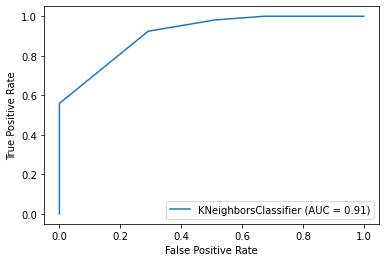

In [181]:
plot_roc_curve(KNN,train_scaled,train_y)

In [182]:
submission=pd.read_csv(r'C:\Users\jayac\Downloads\Dataset\Loan_submission.csv')

In [183]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [184]:
df['Loan_Status']= np.where(df['Loan_Status']==1,'Y','N')

In [185]:
submission['Loan_Status']=prediction_test

In [186]:
submission['Loan_Status']=np.where(submission['Loan_Status']==1,'Y','N')

In [187]:
 submission.to_csv(r'C:\Users\jayac\Downloads\Dataset\sol_Loan_Prediction3.csv',index=False)

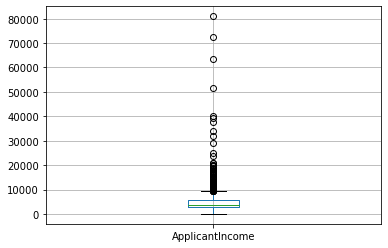

In [188]:
# Box Plot for variable ApplicantIncome of training data set

df.boxplot(column='ApplicantIncome')

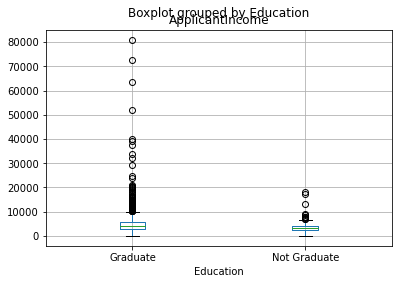

In [189]:
df.boxplot(column='ApplicantIncome', by = 'Education')


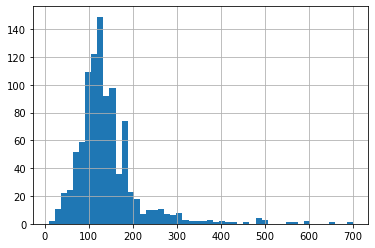

In [190]:
# Histogram of variable LoanAmount

df['LoanAmount'].hist(bins=50)

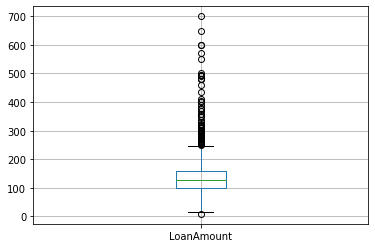

In [191]:
# Box Plot for variable LoanAmount of training data set

df.boxplot(column='LoanAmount')

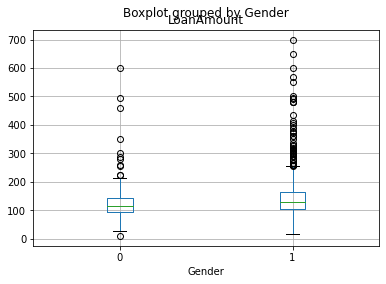

In [192]:
# Box Plot for variable LoanAmount by variable Gender of training data set

df.boxplot(column='LoanAmount', by = 'Gender')

In [193]:
# Credit History and Loan Status
pd.crosstab(df ['Credit_History'], df ['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0,141,7,148
1,418,415,833
All,559,422,981
